# Add data to bins

The bins_to_grid method is a habdy way to project data to the used grid. 

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append('..')

from agrid.agrid import *

In [9]:
ant = Grid(crs=3031, res = [100*km, 100*km], 
           left = 0*km, up=3150*km, right = 3150*km, down = 0*km, 
           depths = range(0, 301*km, 50*km)) #range object is automatically converted to a list

Say that we have a few datapoints, and want the mean for each grid cell. Two examples, 3d bins and 2d bins: 

../agrid/agrid.py:1131: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  epsg=basemap_epsg, **kwargs)


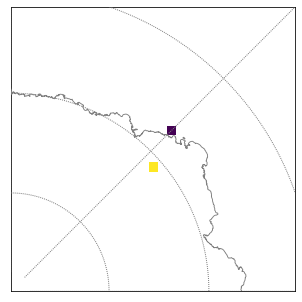

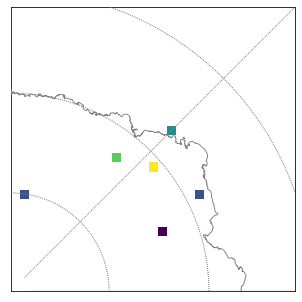

In [10]:
xi = [1700*km, 100*km, 1800*km, 1200*km, 1600*km, 2100*km, 1800*km]
yi = [1800*km, 1000*km, 1400*km, 1500*km, 1800*km, 1000*km, 600*km, ]
zi = [180*km, 10*km, 50*km, 250*km, 60*km, 0*km, 40*km, ]
data = [1, 2, 3, 4, 5, 2, 3]

xi = xi + xi[::-1]
yi = yi[::-1] + yi
zi = zi + zi[::-1]
data = data + data[::-1]

ant.ds['BIN_3D'] = (('Y', 'X', 'Z'), ant.bins_to_grid(data, yi=yi, xi=xi, zi=zi) )
ant.ds['BIN'] = (('Y', 'X'), ant.bins_to_grid(data, yi=yi, xi=xi) )

ant.map_grid(ant.ds['BIN_3D'].isel(Z=1), cmap='viridis', figsize = (4,4))
ant.map_grid(ant.ds['BIN'], cmap='viridis', figsize = (4,4))

In this example we have more data, but not in the same projection as our grid model. This time we pass the data and samples as numpy arrays. We look at standard diviation for each bin. 

(3, 5000)


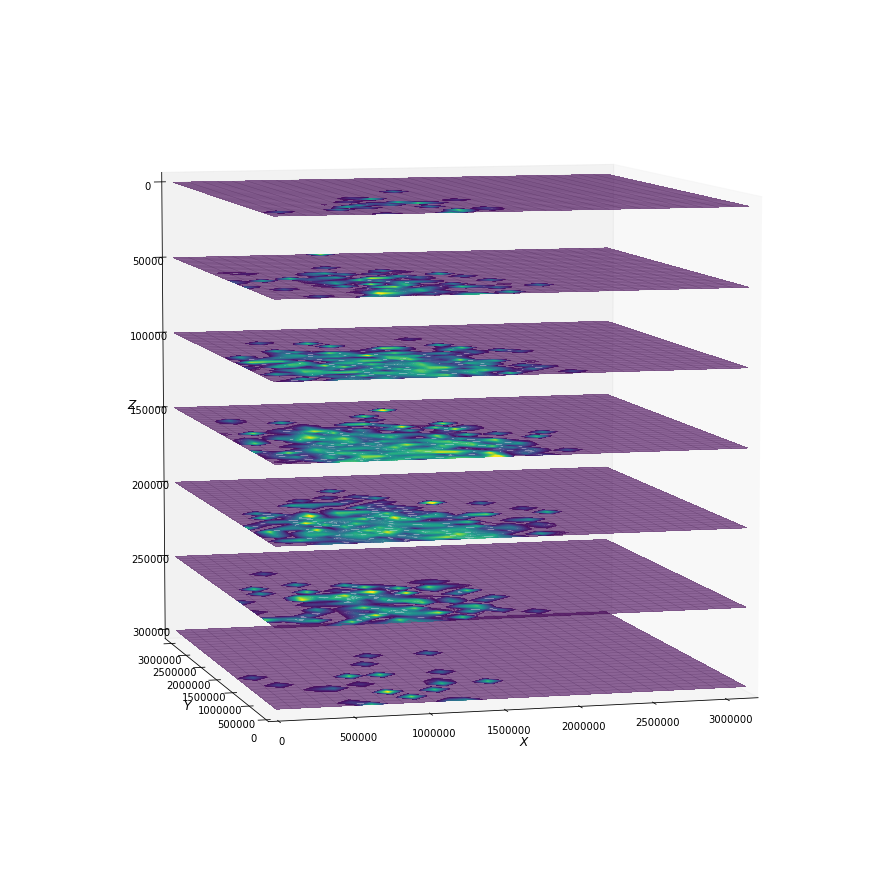

In [11]:
xi_5000 = np.random.normal(500*km, 800*km, 5000)
yi_5000 = np.random.normal(900*km, 500*km, 5000)
zi_5000 = np.random.normal(150*km, 75*km, 5000)

#samples can be passed as a numpy array as:

samples = np.array([xi_5000, yi_5000, zi_5000])
print(np.shape(samples))

data_5000 = np.random.normal(10, 3, 5000)
ant.ds['BIN_3D_N5000'] = (('Y', 'X', 'Z'), ant.bins_to_grid(data_5000, samples=samples, function = 'std') ) #sample_src=4326

ant.layer_cake('BIN_3D_N5000', elev=7, azim = 255, d_alpha = 0.6, cbar= False)

Why not have an oblique look? 

In [ ]:
ant.ds['BIN_N5000'] = (('Y', 'X'), ant.bins_to_grid(data_5000, xi=xi_5000, yi=yi_5000) )

ant.oblique_view('BIN_N5000', show=True, warp_scale=1, distance = 100)